---

# 🏗️ **Pendahuluan**

## 🎯 **Latar Belakang**
Dalam era transformasi digital, industri properti menghadapi tantangan besar dalam memahami **perilaku konsumen, efektivitas tim marketing, dan kualitas proyek perumahan**.  
Data yang dihasilkan dari aktivitas marketing, survei konsumen, dan progress pembangunan kini menjadi sumber informasi berharga yang dapat digunakan untuk **mengukur performa bisnis secara objektif dan terukur**.

Melalui analisis berbasis **Python dan visualisasi data**, laporan ini bertujuan untuk memberikan **gambaran komprehensif** tentang:
- Kinerja staf dan supervisor marketing,  
- Kualitas serta perkembangan proyek perumahan, dan  
- Pola minat serta perilaku calon konsumen.

---

## 🧩 **Tujuan Analisis**
Analisis ini disusun dengan beberapa tujuan utama, yaitu:
1. **Mengidentifikasi performa terbaik** di tingkat staf marketing maupun supervisor berdasarkan skor prospek.  
2. **Menilai kualitas proyek perumahan** berdasarkan aspek-aspek penting seperti bangunan, fasilitas, infrastruktur, dan akses lokasi.  
3. **Menganalisis tren dan perilaku konsumen**, termasuk sumber informasi, usia, dan distribusi minat proyek.  
4. **Menyediakan dasar pengambilan keputusan strategis** untuk manajemen pemasaran dan pengembangan proyek di masa mendatang.

---

## 🧠 **Ruang Lingkup Analisis**
Analisis ini mencakup seluruh data yang berkaitan dengan:
- Aktivitas dan hasil kerja tim marketing,  
- Data proyek dan progress pembangunan, serta  
- Data prospek dan preferensi konsumen.  

Seluruh pengolahan dan visualisasi dilakukan menggunakan **Python (pandas, seaborn, matplotlib, dan squarify)** untuk menghasilkan **insight yang interaktif, informatif, dan mudah diinterpretasikan**.

---

## 💡 **Manfaat yang Diharapkan**
1. Memberikan **tolok ukur kinerja marketing dan supervisor** secara kuantitatif.  
2. Menjadi dasar dalam **penyusunan strategi promosi dan pembagian wilayah kerja**.  
3. Mendukung **pengembangan proyek yang lebih sesuai dengan kebutuhan pasar**.  
4. Menjadi **referensi awal pengembangan sistem dashboard analitik** di lingkungan perusahaan properti.

---

> *“Analisis data bukan sekadar membaca angka, tetapi memahami cerita di baliknya untuk menciptakan keputusan yang lebih cerdas.”*  
> — **Pendahuluan Analisis Python Aktivitas Marketing & Proyek Perumahan**

---

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install squarify
import squarify

# Path file Excel
file_path = r"S:\2. Kursus dan Pembelajaran\0. Data Analytics Project\Project 7 - Marketing Activity and Prospects\Database dan Jupyter\sql and python\database_activity_kbg.xlsx"

# Membaca semua sheet sekaligus
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Assign dataframe untuk setiap sheet
aktivitas = all_sheets.get("aktivitas")
konsumen = all_sheets.get("konsumen")
staff_marketing = all_sheets.get("staff_marketing")
supervisor = all_sheets.get("supervisor")
proyek = all_sheets.get("proyek")
wilayah = all_sheets.get("wilayah")

# Cek isi awal dari setiap dataframe
print("aktivitas:")
print(aktivitas.head(3), "\n")

print("konsumen:")
print(konsumen.head(3), "\n")

print("staff_marketing:")
print(staff_marketing.head(3), "\n")

print("supervisor:")
print(supervisor.head(3), "\n")

print("proyek:")
print(proyek.head(3), "\n")

print("wilayah:")
print(wilayah.head(3), "\n")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


aktivitas:
   activity_id    tanggal  staff_marketing_id  supervisor_id  konsumen_id  \
0         4332 2023-01-01                 238             14         3837   
1         4341 2023-01-03                 243             14         6307   
2         4345 2023-01-04                 244             14         4094   

  referensi_informasi       prospek_konsumen  skor_prospek_konsumen  \
0  What'sApp Business  Tanya Jawab Informasi                      2   
1    Brosur Pemasaran  Tanya Jawab Informasi                      2   
2        Iklan Google   Melakukan Cek Lokasi                      6   

    minat_proyek  blok_id                minat_pembiayaan  \
0  Gebang Permai     2524  Kredit Kepemilikan Rumah (KPR)   
1  Gebang Permai     2797           Cash Bertahap 1 Tahun   
2  Gebang Permai     2309                Take Over Kredit   

   komunikasi_marketing  kepercayaan_marketing  responsif_marketing  \
0              8.290306               8.450971             8.756496   
1       

In [72]:
sns.set(style="whitegrid", palette="muted")

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Atur font agar emoji 📚 bisa tampil di Windows
plt.rcParams["font.family"] = "Segoe UI Emoji"

## 🧭 **Analisis 1 : Tren Aktivitas Marketing Per Bulan**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memantau **perkembangan aktivitas marketing dari waktu ke waktu**, sehingga dapat diketahui pola kenaikan atau penurunan produktivitas tim.  
Dengan meninjau tren bulanan, manajemen dapat:
- Menilai konsistensi aktivitas marketing.  
- Mengidentifikasi periode dengan performa tertinggi atau terendah.  
- Mengambil keputusan strategis berdasarkan fluktuasi tren.

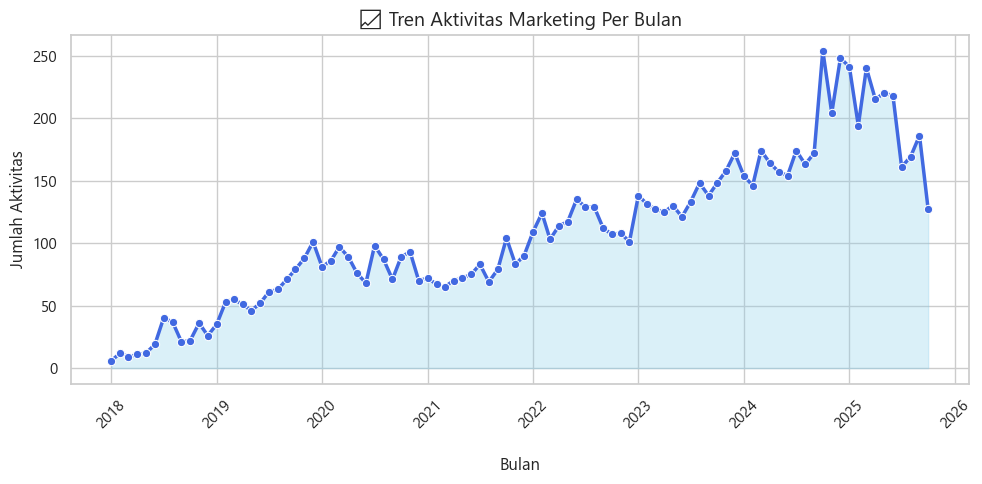

In [75]:
# Pastikan kolom tanggal bertipe datetime
aktivitas["tanggal"] = pd.to_datetime(aktivitas["tanggal"])

# Buat kolom bulan
aktivitas["bulan"] = aktivitas["tanggal"].dt.to_period("M").dt.to_timestamp()

# Hitung jumlah aktivitas per bulan
trend_aktivitas = aktivitas.groupby("bulan")["activity_id"].count().reset_index()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(
    data=trend_aktivitas, 
    x="bulan", 
    y="activity_id", 
    color="royalblue", 
    linewidth=2.5, marker="o")

plt.fill_between(
    trend_aktivitas["bulan"].astype(str), 
    trend_aktivitas["activity_id"], 
    color="skyblue", alpha=0.3)

plt.title("📈 Tren Aktivitas Marketing Per Bulan", fontsize=14, weight="bold")
plt.xlabel("\nBulan")
plt.ylabel("Jumlah Aktivitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📈 **Interpretasi Hasil**
Output dari kode ini akan menampilkan **grafik garis (line chart)** yang menggambarkan jumlah aktivitas marketing setiap bulan.  
Pola yang dapat diinterpretasikan:
- **Kenaikan jumlah aktivitas** → menunjukkan peningkatan kinerja dan intensitas marketing.  
- **Penurunan aktivitas** → perlu evaluasi penyebabnya, misalnya faktor musiman, strategi, atau alokasi sumber daya.  
- **Pola fluktuatif** → mengindikasikan inkonsistensi yang perlu distabilkan melalui monitoring dan pembinaan.

### ✅ **Kesimpulan**
Analisis tren ini membantu perusahaan memahami **dinamika performa marketing secara temporal**.  
Dari hasil visualisasi, perusahaan dapat:
- Menentukan **bulan dengan performa puncak atau lemah**.  
- Menyesuaikan **target dan strategi kampanye** pada periode tertentu.  
- Menyusun **perencanaan aktivitas berkelanjutan** untuk menjaga konsistensi performa tim.

## 🧭 **Analisis 2 : Tren Rata-rata Skor Prospek Konsumen Per Bulan**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memantau **perubahan rata-rata skor prospek konsumen dari waktu ke waktu**.  
Skor prospek mencerminkan **kualitas interaksi marketing** — semakin tinggi skornya, semakin besar potensi prospek menjadi konsumen aktual.  
Dengan menganalisis tren ini, perusahaan dapat:
- Mengevaluasi efektivitas strategi marketing dari bulan ke bulan.  
- Mengidentifikasi periode peningkatan atau penurunan kualitas prospek.  
- Menyesuaikan pendekatan komunikasi dan promosi berdasarkan hasil tren.

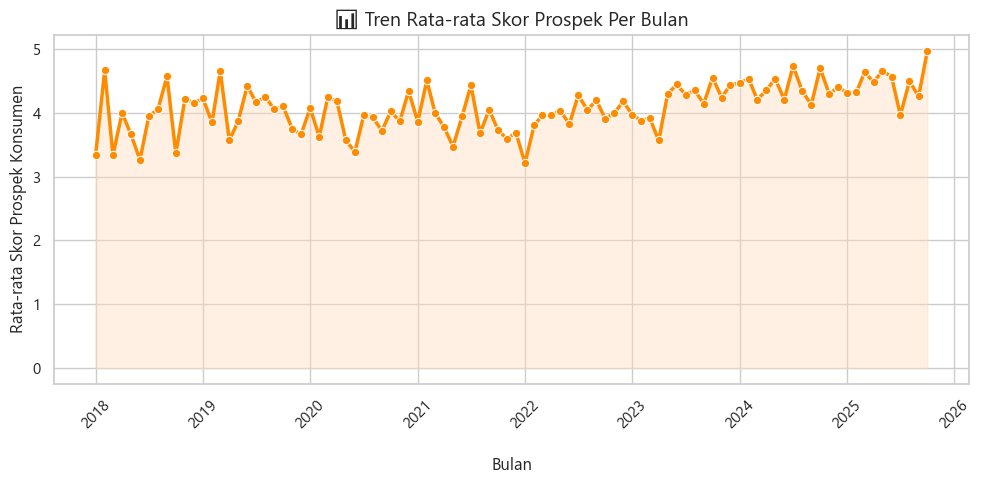

In [76]:
# Hitung rata-rata skor prospek per bulan
trend_skor = aktivitas.groupby("bulan")["skor_prospek_konsumen"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(
    data=trend_skor, 
    x="bulan", 
    y="skor_prospek_konsumen", 
    color="darkorange", 
    linewidth=2.5, 
    marker="o")

plt.fill_between(
    trend_skor["bulan"].astype(str), 
    trend_skor["skor_prospek_konsumen"], 
    color="peachpuff", 
    alpha=0.4)

plt.title("📊 Tren Rata-rata Skor Prospek Per Bulan", fontsize=14, weight="bold")
plt.xlabel("\nBulan")
plt.ylabel("Rata-rata Skor Prospek Konsumen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menampilkan **grafik garis tren rata-rata skor prospek per bulan**.  
Interpretasi yang dapat dilakukan antara lain:
- **Kenaikan tren skor** → menunjukkan peningkatan kualitas interaksi marketing dan efektivitas strategi komunikasi.  
- **Penurunan tren skor** → menandakan perlu adanya perbaikan strategi, materi promosi, atau pembinaan tenaga marketing.  
- **Stabilitas tren** → menggambarkan konsistensi dalam kualitas pendekatan terhadap calon konsumen.

Grafik ini juga membantu mengenali **bulan-bulan dengan performa terbaik**, yang bisa menjadi referensi dalam penyusunan strategi jangka panjang.

### ✅ **Kesimpulan**
Analisis tren rata-rata skor prospek per bulan memberikan wawasan penting mengenai **kualitas prospek yang dihasilkan oleh aktivitas marketing**.  
Dari hasilnya, perusahaan dapat:
- Mengukur sejauh mana strategi promosi meningkatkan minat konsumen.  
- Menentukan **waktu paling efektif** untuk kampanye marketing.  
- Melakukan **evaluasi kinerja tim** serta memperkuat strategi di periode dengan skor rendah.

## 🧭 **Analisis 4 : Distribusi Sumber Referensi Informasi Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengetahui **asal-usul informasi yang digunakan calon konsumen** dalam mengenal produk atau proyek perusahaan.  
Dengan memahami sumber referensi paling banyak digunakan, tim marketing dapat:
- Mengidentifikasi **kanal promosi paling efektif**.  
- Mengoptimalkan **alokasi anggaran pemasaran** ke sumber informasi dengan dampak terbesar.  
- Menilai **performa media promosi** seperti iklan digital, rekomendasi, atau media sosial.

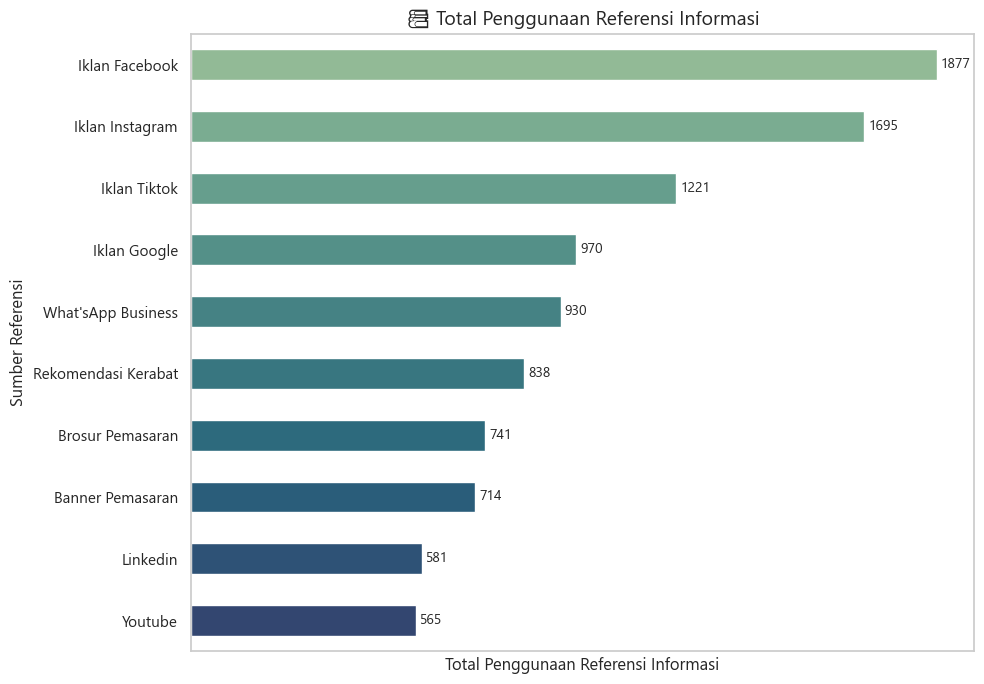

In [77]:
# Atur font agar emoji 📚 bisa tampil di Windows
plt.rcParams["font.family"] = "Segoe UI Emoji"

# Hitung jumlah aktivitas per sumber informasi
info_ref = aktivitas["referensi_informasi"].value_counts().reset_index()
info_ref.columns = ["Referensi Informasi", "Jumlah"]

# Visualisasi
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=info_ref, 
    x="Jumlah", 
    y="Referensi Informasi", 
    width = 0.5,
    palette="crest"
)

# Tambahkan label di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, weight="bold")

# Hapus grid dan xticks
ax.grid(False)
ax.set_xticks([])

# Judul dan label sumbu
plt.title("📚 Total Penggunaan Referensi Informasi", fontsize=14, weight="bold")
plt.xlabel("Total Penggunaan Referensi Informasi")
plt.ylabel("Sumber Referensi")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menampilkan **grafik batang horizontal** yang menunjukkan jumlah penggunaan setiap **referensi informasi** oleh konsumen.  
Interpretasi hasil mencakup:
- **Bar paling panjang** menunjukkan sumber informasi paling dominan (misalnya media sosial, teman, atau iklan online).  
- **Perbedaan antar bar** mencerminkan variasi efektivitas antar kanal promosi.  
- Sumber informasi dengan frekuensi rendah bisa menjadi bahan evaluasi, apakah karena jangkauan kurang optimal atau strategi komunikasi belum sesuai.

Visualisasi ini membantu menentukan **prioritas saluran pemasaran**, sehingga promosi dapat difokuskan pada media yang terbukti efektif menarik prospek.

### ✅ **Kesimpulan**
Analisis distribusi sumber referensi informasi memberikan gambaran jelas tentang **media atau kanal paling berpengaruh dalam proses akuisisi prospek**.  
Dari hasilnya, perusahaan dapat:
- Memperkuat promosi di kanal dengan tingkat eksposur tinggi.  
- Mengurangi investasi di media dengan performa rendah.  
- Mengembangkan strategi komunikasi berbasis **data aktual perilaku konsumen** untuk meningkatkan efisiensi dan hasil kampanye marketing berikutnya.

## 🧭 **Analisis 4 : Distribusi Minat Pembiayaan Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memahami **preferensi calon konsumen terhadap jenis pembiayaan** yang ditawarkan perusahaan.  
Dengan mengetahui distribusi minat pembiayaan, tim marketing dapat:
- Menentukan jenis pembiayaan yang paling diminati oleh pasar.  
- Mengidentifikasi segmen konsumen berdasarkan preferensi finansial.  
- Menyesuaikan strategi penawaran produk sesuai kebutuhan konsumen.

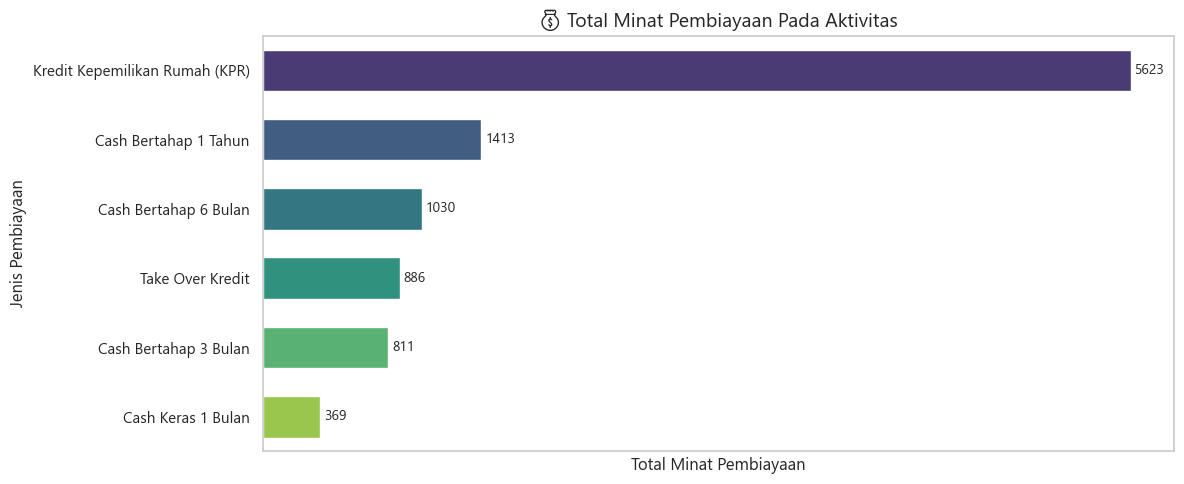

In [78]:
# Hitung total aktivitas berdasarkan minat pembiayaan
pembiayaan_count = aktivitas["minat_pembiayaan"].value_counts().reset_index()
pembiayaan_count.columns = ["Minat Pembiayaan", "Jumlah"]

# Visualisasi
plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=pembiayaan_count, 
    x="Jumlah", 
    y="Minat Pembiayaan", 
    width = 0.6,
    palette="viridis"
)

# Tambahkan label jumlah di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, weight="bold")

# Hapus grid dan xticks
ax.grid(False)
ax.set_xticks([])

# Judul dan label sumbu
plt.title("💰 Total Minat Pembiayaan Pada Aktivitas", fontsize=14, weight="bold")
plt.xlabel("Total Minat Pembiayaan")
plt.ylabel("Jenis Pembiayaan")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menampilkan **grafik batang horizontal** yang memperlihatkan jumlah aktivitas berdasarkan **jenis pembiayaan yang diminati**.  
Interpretasi utama:
- **Bar paling panjang** menunjukkan jenis pembiayaan yang paling banyak dipilih atau diminati oleh calon konsumen.  
- **Jenis pembiayaan dengan minat rendah** bisa menjadi bahan evaluasi terhadap skema, promosi, atau persyaratan yang kurang menarik.  
- **Pola distribusi minat** dapat memberikan insight mengenai preferensi pasar terhadap cara pembayaran atau dukungan keuangan tertentu.

Visualisasi ini membantu perusahaan memahami **perilaku finansial konsumen**, sekaligus menilai efektivitas strategi produk pembiayaan yang ada.

### ✅ **Kesimpulan**
Analisis distribusi minat pembiayaan memberikan pandangan strategis terkait **kecenderungan calon konsumen dalam memilih jenis pembiayaan**.  
Dari hasilnya, perusahaan dapat:
- Memperkuat promosi pada jenis pembiayaan yang paling diminati.  
- Melakukan inovasi atau modifikasi pada produk pembiayaan dengan minat rendah.  
- Mengembangkan strategi pemasaran berbasis data untuk meningkatkan **konversi pembiayaan** di masa mendatang.

## 🧭 **Analisis 5 : Proporsi Status Prospek Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk menggambarkan **komposisi status prospek konsumen** secara visual dan proporsional.  
Status prospek menunjukkan **tahapan atau kondisi ketertarikan calon konsumen** dalam proses marketing.  
Dengan analisis ini, perusahaan dapat:
- Memantau seberapa besar proporsi konsumen yang tertarik, tidak tertarik, atau masih dalam tahap pertimbangan.  
- Mengevaluasi efektivitas pendekatan marketing terhadap hasil prospek.  
- Menentukan prioritas tindak lanjut berdasarkan distribusi status prospek.

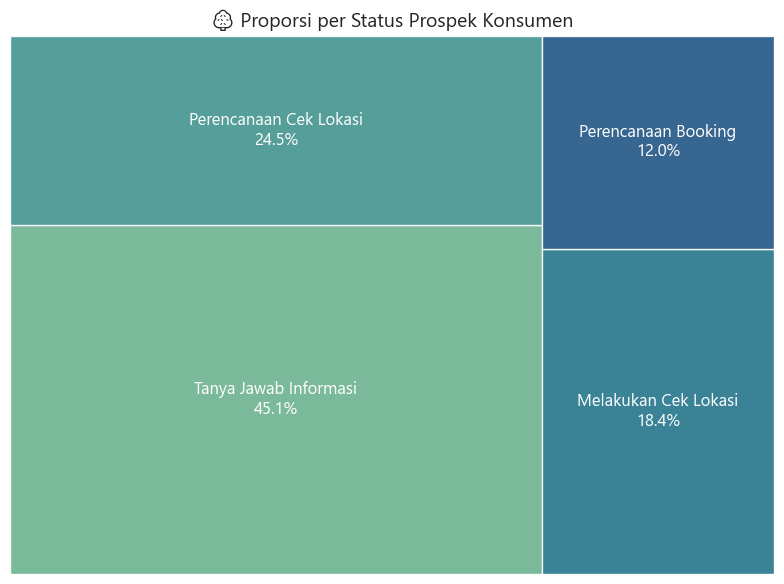

In [79]:
# Hitung proporsi berdasarkan status prospek
status_prop = aktivitas["prospek_konsumen"].value_counts(normalize=True).reset_index()
status_prop.columns = ["Status Prospek", "Proporsi"]

# Ubah proporsi ke persen agar lebih informatif di label
status_prop["Persentase"] = status_prop["Proporsi"] * 100

# Warna gradasi yang menarik
colors = sns.color_palette("crest", len(status_prop))

# Visualisasi Treemap
plt.figure(figsize=(8,6))
squarify.plot(
    sizes=status_prop["Proporsi"],
    label=[
        f"{status}\n{persen:.1f}%"
        for status, persen in zip(status_prop["Status Prospek"], status_prop["Persentase"])
    ],
    color=colors,
    alpha=0.9,
    text_kwargs={"fontsize": 12, "weight": "bold", "color": "white"}
)

# Judul
plt.title("🌳 Proporsi per Status Prospek Konsumen", fontsize=14, weight="bold")

# Hilangkan sumbu untuk tampilan bersih
plt.axis("off")
plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menghasilkan **visualisasi treemap** yang menunjukkan **proporsi setiap kategori status prospek**.  
Interpretasi hasil dapat mencakup:
- **Area paling besar** mewakili status prospek yang paling dominan, misalnya “Tertarik” atau “Follow Up”.  
- **Status dengan proporsi kecil** mengindikasikan area yang memerlukan perhatian atau perbaikan strategi.  
- Pola distribusi ini dapat membantu mengukur **tingkat efektivitas funnel pemasaran** dari awareness hingga konversi.

Visualisasi treemap ini memberikan gambaran yang intuitif dan informatif tentang **komposisi keseluruhan status prospek** dalam database aktivitas marketing.

### ✅ **Kesimpulan**
Analisis proporsi status prospek membantu perusahaan untuk memahami **sebaran kondisi calon konsumen** dalam proses marketing.  
Dari hasil ini, perusahaan dapat:
- Mengidentifikasi status yang paling dominan untuk memperkuat pendekatan keberhasilan.  
- Menyusun strategi khusus bagi status dengan proporsi kecil agar tingkat konversi meningkat.  
- Menggunakan data ini sebagai dasar perencanaan **follow-up yang lebih terarah dan efisien**.

---

## 🧭 **Analisis 6 : Segmentasi Jenis Kelamin Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengetahui **distribusi jenis kelamin konsumen** yang terlibat dalam aktivitas marketing.  
Informasi ini penting untuk memahami **karakteristik demografis pasar**, serta membantu tim marketing dalam:
- Menyusun strategi komunikasi yang sesuai dengan target audiens.  
- Mengidentifikasi dominasi gender tertentu dalam aktivitas pemasaran.  
- Menentukan arah kampanye yang lebih personal dan efektif berdasarkan data demografis.

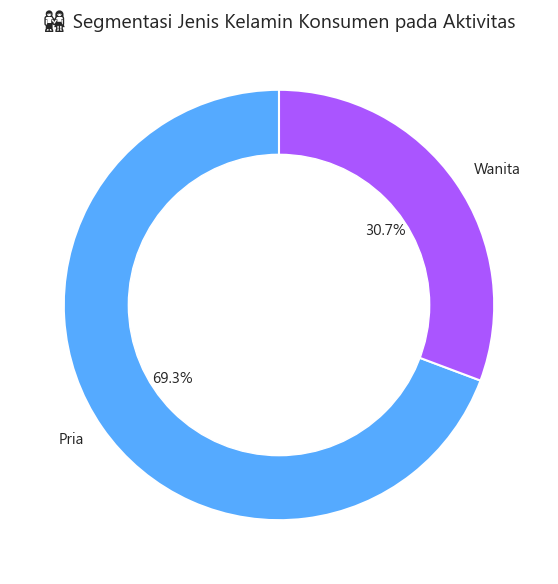

In [80]:
# Hitung distribusi jenis kelamin
gender_dist = konsumen["jenis_kelamin"].value_counts().reset_index()
gender_dist.columns = ["Jenis Kelamin", "Jumlah"]

# Warna pastel yang lembut dan konsisten
colors = sns.color_palette("cool", len(gender_dist))

# Visualisasi Donut Chart
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    gender_dist["Jumlah"],
    labels=gender_dist["Jenis Kelamin"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    textprops={"fontsize": 11, "weight": "bold"}
)

# Tambahkan lingkaran putih di tengah untuk efek "donut"
centre_circle = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Judul
plt.title("👫 Segmentasi Jenis Kelamin Konsumen pada Aktivitas", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menampilkan **diagram donat (donut chart)** yang memperlihatkan proporsi konsumen berdasarkan jenis kelamin.  
Interpretasi yang dapat dilakukan:
- **Proporsi terbesar** menunjukkan gender yang paling aktif atau dominan dalam aktivitas marketing.  
- **Keseimbangan antara gender** mengindikasikan strategi pemasaran yang inklusif dan merata.  
- **Ketimpangan proporsi** dapat menjadi sinyal untuk memperluas jangkauan atau menyesuaikan pesan promosi agar lebih menarik bagi gender tertentu.

Visualisasi ini memberikan gambaran yang jelas dan cepat dipahami tentang **komposisi gender dalam basis konsumen perusahaan**.

### ✅ **Kesimpulan**
Analisis segmentasi jenis kelamin membantu perusahaan untuk:
- Memahami **profil konsumen dari perspektif demografis**.  
- Menentukan **strategi komunikasi dan kampanye yang lebih tepat sasaran**.  
- Mengembangkan pendekatan pemasaran yang inklusif dan sesuai dengan karakteristik audiens aktual.  
Dengan mengetahui proporsi ini, perusahaan dapat mengoptimalkan upaya marketing agar lebih efektif dalam menjangkau semua segmen konsumen.

## 🧭 **Analisis 7 : Perbandingan Status Pernikahan Konsumen per Jenis Kelamin**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memahami **hubungan antara status pernikahan dan jenis kelamin konsumen**.  
Informasi ini berguna untuk mengidentifikasi **pola demografis** dalam basis konsumen, yang dapat membantu perusahaan dalam:
- Menyesuaikan pendekatan marketing berdasarkan segmen sosial-demografis.  
- Menilai potensi kebutuhan produk yang berbeda antara konsumen menikah dan belum menikah.  
- Mengembangkan strategi komunikasi yang lebih relevan dengan kondisi personal konsumen.

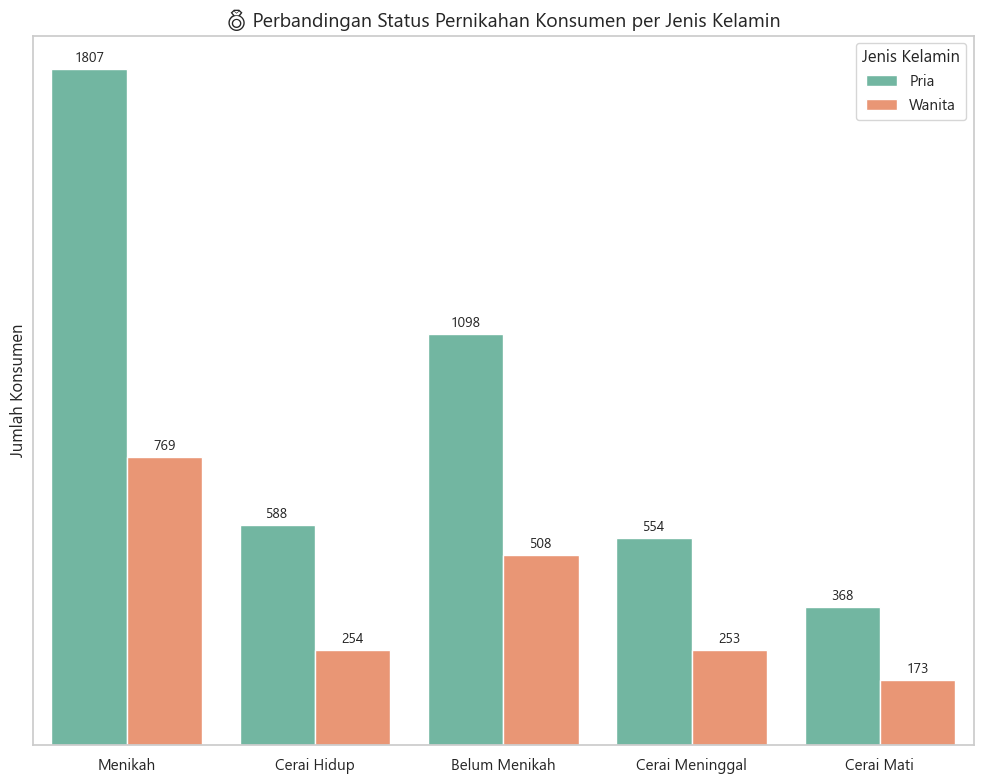

In [81]:
# Visualisasi
plt.figure(figsize=(10,8))
ax = sns.countplot(
    data=konsumen, 
    x="status_pernikahan", 
    hue="jenis_kelamin", 
    palette="Set2"
)

# Tambahkan label di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=10, weight="bold")

# Hilangkan grid
ax.grid(False)

# Hapus yticks (angka sumbu Y), tapi biarkan label Y
ax.set_yticks([])

# Hapus label X
ax.set_xlabel("")

# Tambahkan judul dan label sumbu Y
plt.title("💍 Perbandingan Status Pernikahan Konsumen per Jenis Kelamin", fontsize=14, weight="bold")
plt.ylabel("Jumlah Konsumen")

# Atur legend
plt.legend(title="Jenis Kelamin")

plt.tight_layout()
plt.show()


### 📈 **Interpretasi Hasil**
Output dari kode ini menampilkan **grafik batang bertumpuk (countplot)** yang memperlihatkan **jumlah konsumen berdasarkan status pernikahan dan jenis kelamin**.  
Interpretasi hasil mencakup:
- **Perbandingan antar-gender** dalam setiap kategori status pernikahan (misalnya menikah, belum menikah, duda/janda).  
- **Dominasi kategori tertentu**, misalnya jika lebih banyak konsumen laki-laki menikah dibanding perempuan belum menikah.  
- **Keseimbangan distribusi** yang dapat menunjukkan karakteristik umum audiens perusahaan.

Grafik ini juga membantu dalam memahami **profil sosial** konsumen, yang bisa menjadi dasar dalam segmentasi pasar atau perancangan pesan promosi yang lebih tepat sasaran.

### ✅ **Kesimpulan**
Analisis ini memberikan wawasan mengenai **distribusi status pernikahan konsumen berdasarkan jenis kelamin**.  
Dari hasilnya, perusahaan dapat:
- Mengidentifikasi segmen demografis dominan dalam basis konsumen.  
- Menyesuaikan **strategi produk dan komunikasi pemasaran** agar relevan dengan karakteristik sosial audiens.  
- Mengembangkan pendekatan promosi yang lebih personal dan sesuai dengan kebutuhan tiap kelompok konsumen.

## 🧭 **Analisis 8 : Perbandingan Jenis Pekerjaan Konsumen per Jenis Kelamin**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengetahui **sebaran jenis pekerjaan konsumen berdasarkan jenis kelamin**.  
Pemahaman terhadap komposisi pekerjaan membantu perusahaan dalam:
- Menentukan **segmen profesi dominan** di antara konsumen.  
- Menyesuaikan strategi promosi sesuai dengan karakteristik ekonomi dan sosial setiap kelompok pekerjaan.  
- Mengidentifikasi potensi pasar baru berdasarkan profesi dengan keterlibatan rendah.

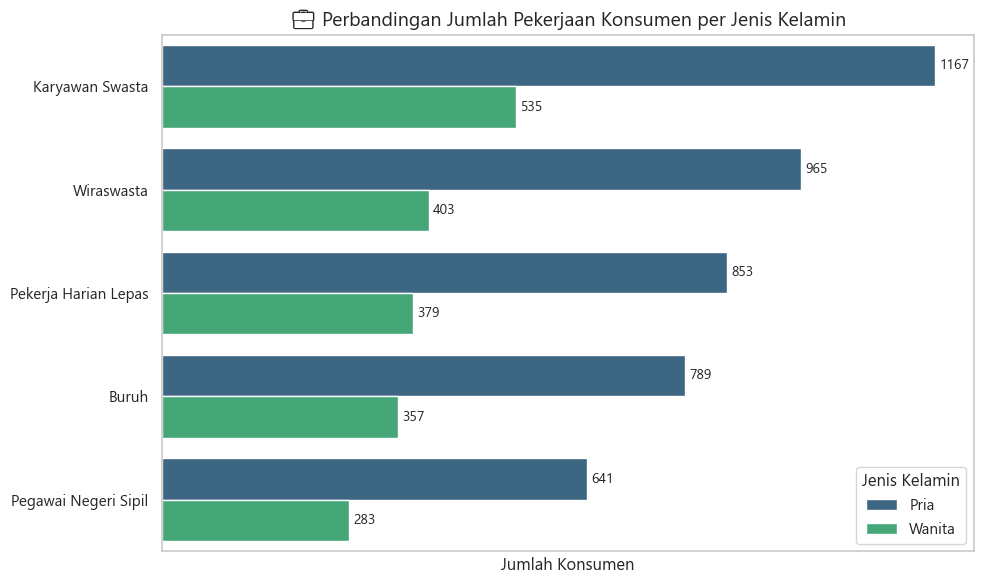

In [82]:
# Visualisasi
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=konsumen,
    y="pekerjaan",
    hue="jenis_kelamin",
    palette="viridis",
    order=konsumen["pekerjaan"].value_counts().index
)

# Tambahkan label jumlah di ujung setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=10, weight="bold")

# Hapus grid
ax.grid(False)

# Hapus xticks (angka di sumbu X) tapi biarkan label X
ax.set_xticks([])

# Hapus label Y (tulisan di sumbu Y) tapi biarkan yticks (kategori pekerjaan)
ax.set_ylabel("")

# Tambahkan judul dan label sumbu X
plt.title("💼 Perbandingan Jumlah Pekerjaan Konsumen per Jenis Kelamin", fontsize=14, weight="bold")
plt.xlabel("Jumlah Konsumen")

# Legend
plt.legend(title="Jenis Kelamin")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menghasilkan **grafik batang horizontal (countplot)** yang memperlihatkan jumlah konsumen berdasarkan pekerjaan, dipisahkan menurut jenis kelamin.  
Interpretasi yang dapat dilakukan:
- **Bar terpanjang** menunjukkan pekerjaan dengan jumlah konsumen terbanyak.  
- **Perbedaan warna antar bar** menggambarkan distribusi laki-laki dan perempuan dalam tiap jenis pekerjaan.  
- **Ketimpangan distribusi gender** di suatu profesi dapat menjadi sinyal penting dalam memahami pola partisipasi pasar.  

Grafik ini memberikan pandangan menyeluruh tentang **profil pekerjaan konsumen**, serta memperlihatkan variasi demografis yang dapat dijadikan dasar dalam penyusunan strategi pemasaran berbasis segmen profesi.

### ✅ **Kesimpulan**
Analisis jenis pekerjaan konsumen per jenis kelamin memberikan insight tentang **struktur demografis dan ekonomi audiens perusahaan**.  
Dari hasilnya, perusahaan dapat:
- Menentukan **profesi utama yang menjadi target dominan** dalam aktivitas marketing.  
- Mengembangkan **strategi penawaran yang relevan** dengan kebutuhan tiap kelompok pekerjaan.  
- Meningkatkan efektivitas kampanye dengan pesan yang disesuaikan berdasarkan **profil pekerjaan dan gender konsumen**.

## 🧭 **Analisis 9 : Distribusi Usia Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk menggambarkan **penyebaran usia konsumen** yang terlibat dalam aktivitas marketing.  
Dengan memahami distribusi usia, perusahaan dapat:
- Mengetahui **kelompok umur dominan** dalam basis konsumen.  
- Menyesuaikan strategi komunikasi dan produk berdasarkan **preferensi tiap generasi**.  
- Mengidentifikasi peluang ekspansi ke segmen usia yang belum tergarap optimal.

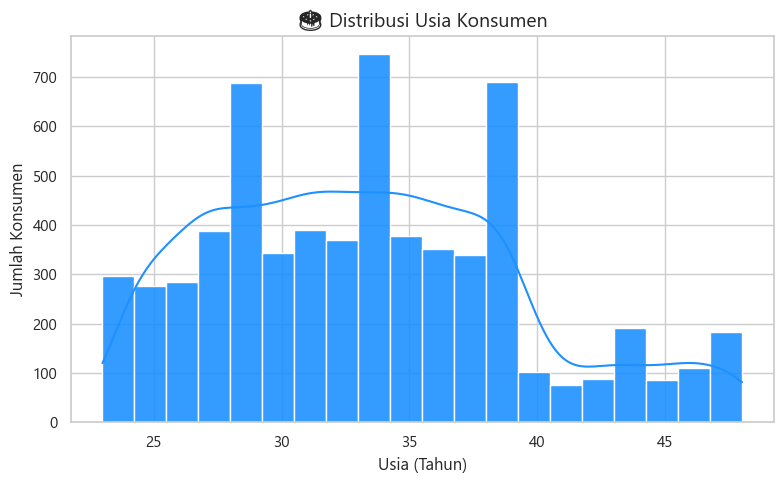

In [83]:
# Visualisasi distribusi usia
plt.figure(figsize=(8,5))
sns.histplot(
    konsumen["usia"], 
    bins=20,             # 🔹 Lebih banyak bin untuk detail lebih halus
    kde=True,            # 🔹 Tambahkan garis densitas
    color="dodgerblue",  # 🔹 Warna lebih padat dan solid
    alpha=0.9,           # 🔹 Kurangi transparansi
    edgecolor="white",   # 🔹 Tambahkan tepi putih biar kontras
    linewidth=1
)

plt.title("🎂 Distribusi Usia Konsumen", fontsize=14, weight="bold")
plt.xlabel("Usia (Tahun)")
plt.ylabel("Jumlah Konsumen")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menghasilkan **histogram distribusi usia konsumen** dengan tambahan **kurva densitas (KDE)** untuk menunjukkan pola penyebaran yang lebih halus.  
Interpretasi hasil meliputi:
- **Puncak distribusi (mode)** menunjukkan kelompok usia dengan jumlah konsumen terbanyak.  
- **Penyebaran lebar** mengindikasikan bahwa konsumen berasal dari berbagai rentang umur.  
- **Distribusi condong ke kanan atau kiri** dapat menunjukkan dominasi kelompok usia muda atau tua dalam basis pelanggan.

Visualisasi ini membantu memahami **profil umur audiens**, yang penting dalam menentukan arah promosi dan strategi produk agar sesuai dengan karakteristik demografis pasar.

### ✅ **Kesimpulan**
Analisis distribusi usia memberikan wawasan tentang **struktur umur konsumen** yang menjadi target utama perusahaan.  
Dari hasilnya, perusahaan dapat:
- Mengidentifikasi kelompok umur yang paling responsif terhadap aktivitas marketing.  
- Menyusun **strategi segmentasi pasar berbasis usia** untuk meningkatkan efektivitas kampanye.  
- Merancang produk dan pesan promosi yang lebih relevan sesuai dengan kebutuhan dan gaya hidup setiap kelompok usia.

## 🧭 **Analisis 10 : Perbandingan Kategori Pendapatan Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengidentifikasi **distribusi pendapatan konsumen** yang menjadi target aktivitas marketing.  
Dengan memahami pola pendapatan, perusahaan dapat:
- Menentukan **segmen ekonomi dominan** dalam basis konsumen.  
- Menyesuaikan strategi penawaran produk sesuai **daya beli calon konsumen**.  
- Mengembangkan program promosi yang lebih relevan bagi tiap kelompok pendapatan.

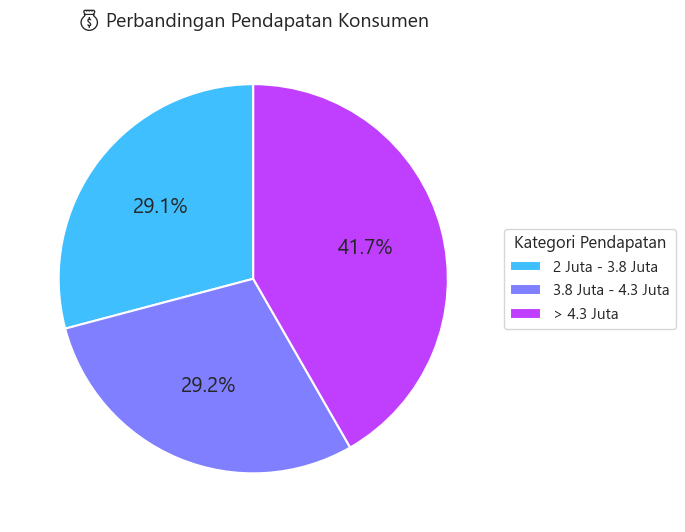

In [84]:
# Buat kategori pendapatan
bins = [0, 2000000, 3800000, 4300000, konsumen["penghasilan"].max()]
labels = ["< 2 Juta", "2 Juta - 3.8 Juta", "3.8 Juta - 4.3 Juta", "> 4.3 Juta"]
konsumen["kategori_pendapatan"] = pd.cut(
    konsumen["penghasilan"], bins=bins, labels=labels, include_lowest=True
)

# Hitung jumlah per kategori dan hapus kategori "< 2 Juta"
income_dist = (
    konsumen["kategori_pendapatan"]
    .value_counts()
    .reindex(labels)
    .reset_index()
)
income_dist.columns = ["Kategori Pendapatan", "Jumlah"]

# 🔹 Hapus kategori "< 2 Juta"
income_dist = income_dist[income_dist["Kategori Pendapatan"] != "< 2 Juta"]

# Warna pie chart
colors = sns.color_palette("cool", len(income_dist))

# Visualisasi Pie Chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    income_dist["Jumlah"],
    labels=None,  # Hapus label kategori di dalam pie
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor="white", linewidth=1.5),
    textprops={"fontsize": 15, "weight": "bold"}  # Persentase tebal
)

# Legend (kategori pendapatan selain "< 2 Juta")
plt.legend(
    wedges,
    income_dist["Kategori Pendapatan"],
    title="Kategori Pendapatan",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Judul
plt.title("💰 Perbandingan Pendapatan Konsumen", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()

### 📈 **Interpretasi Hasil**
Output dari kode ini menghasilkan **diagram pie** yang menunjukkan **proporsi konsumen berdasarkan kategori pendapatan**, dengan empat kelompok utama:
1. 2 Juta – 3.8 Juta  
2. 3.8 Juta – 4.3 Juta  
3. Lebih dari 4.3 Juta  

Namun, pada visualisasi akhir kategori **"< 2 Juta"** dihapus agar analisis lebih fokus pada segmen berdaya beli menengah ke atas.  
Interpretasi hasil meliputi:
- **Irisan terbesar** menunjukkan kelompok pendapatan dengan jumlah konsumen terbanyak.  
- **Proporsi antar kategori** menggambarkan sebaran ekonomi konsumen, yang dapat menjadi acuan dalam penentuan harga produk.  
- Jika sebagian besar konsumen berada pada kelompok pendapatan tinggi, strategi premium dapat diterapkan; sebaliknya, dominasi kelompok menengah ke bawah dapat diarahkan ke strategi affordability.

### ✅ **Kesimpulan**
Analisis distribusi pendapatan memberikan pandangan strategis mengenai **daya beli dan potensi pasar konsumen**.  
Dari hasil ini, perusahaan dapat:
- Mengidentifikasi segmen ekonomi utama yang paling potensial.  
- Menyesuaikan **strategi harga dan promosi** agar sejalan dengan kemampuan finansial target pasar.  
- Mengembangkan **produk dan layanan diferensial** berdasarkan tingkat pendapatan untuk meningkatkan penetrasi pasar dan loyalitas konsumen.

---

## 🧭 **Analisis 11 : Top 10 Staff Marketing Berdasarkan Total Skor Prospek Konsumen**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengidentifikasi **10 staff marketing dengan performa terbaik** berdasarkan **total skor prospek konsumen** yang mereka hasilkan.  
Tujuan utamanya meliputi:
- Mengevaluasi **produktivitas dan efektivitas kinerja individu** dalam menghasilkan prospek berkualitas.  
- Memberikan dasar objektif untuk **pemberian insentif, pelatihan, atau promosi**.  
- Meningkatkan daya saing dan motivasi tim melalui pengukuran berbasis data.

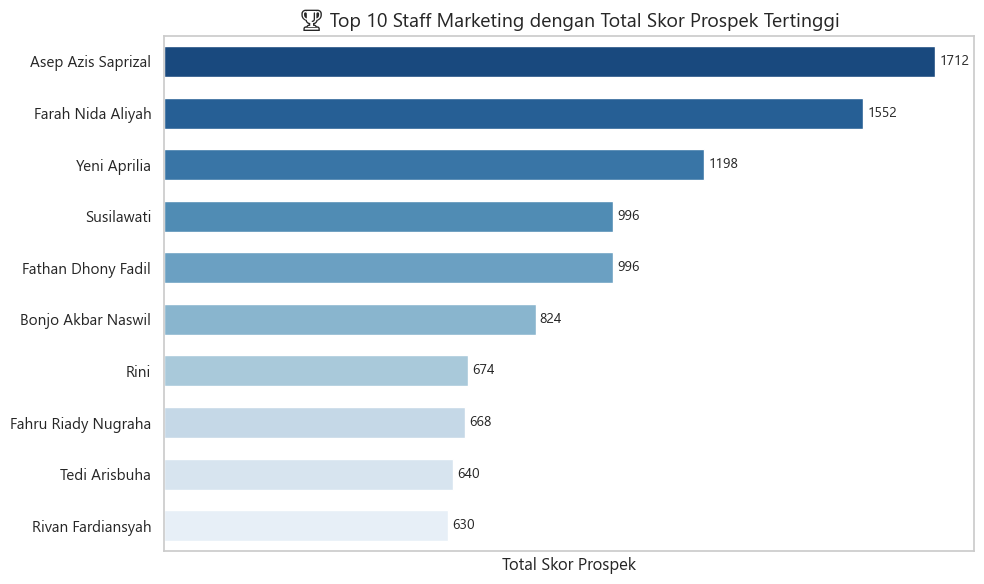

In [85]:
# Hitung total skor prospek per staff
merged = aktivitas.merge(staff_marketing, on='staff_marketing_id', how='left')
top_staff = (
    merged.groupby("nama_marketing")["skor_prospek_konsumen"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Visualisasi
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_staff,
    x="skor_prospek_konsumen",
    y="nama_marketing",
    palette="Blues_r",
    width = 0.6
)

# Tambahkan label di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=10, weight="bold")

# Hapus grid
ax.grid(False)

# Hapus xticks (angka di bawah sumbu X) tapi biarkan label X
ax.set_xticks([])

# Hapus label Y tapi tetap tampilkan yticks (nama staff)
ax.set_ylabel("")

# Tambahkan judul dan label X
plt.title("🏆 Top 10 Staff Marketing dengan Total Skor Prospek Tertinggi", fontsize=14, weight="bold")
plt.xlabel("Total Skor Prospek")

plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Visualisasi menampilkan **diagram batang horizontal** yang memperlihatkan nama-nama 10 staff marketing dengan skor prospek tertinggi.  
Beberapa hal yang dapat diamati dari hasil ini:
- **Panjang batang** menggambarkan total skor prospek yang berhasil dikumpulkan oleh masing-masing staff.  
- Staff dengan skor tertinggi menunjukkan **kemampuan unggul dalam menjaring dan mengonversi calon konsumen potensial**.  
- Perbedaan antar batang mencerminkan **variasi performa antar individu**, yang dapat digunakan untuk identifikasi kebutuhan coaching atau best practice sharing.

Jika terdapat jarak signifikan antara peringkat teratas dan bawah, hal tersebut menunjukkan adanya **kesenjangan produktivitas** yang perlu diatasi dengan strategi pelatihan atau pembagian target yang lebih proporsional.

### ✅ **Kesimpulan**
Analisis ini menegaskan pentingnya **pemantauan performa berbasis data** di tim marketing.  
Hasil menunjukkan siapa saja **staff dengan kontribusi terbesar** terhadap potensi konsumen dan memberikan dasar yang kuat untuk:
- Mengapresiasi dan mempertahankan **karyawan berprestasi tinggi**.  
- Menyusun **strategi pengembangan kinerja tim** agar lebih seimbang.  
- Menentukan **benchmark internal** dalam evaluasi efektivitas marketing secara berkelanjutan.

## 🧭 **Analisis 12 : Total Skor Prospek per Supervisor**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengevaluasi **kontribusi dan kinerja setiap supervisor** dalam mengelola prospek konsumen.  
Secara khusus, analisis ini membantu untuk:
- Mengidentifikasi supervisor dengan **skor prospek tertinggi** sebagai indikator efektivitas kepemimpinan.  
- Mengevaluasi **perbedaan performa antar supervisor** dalam mendukung tim marketing.  
- Memberikan dasar bagi **penilaian kinerja dan pengambilan keputusan manajerial** terkait pembinaan, penghargaan, atau redistribusi tanggung jawab.

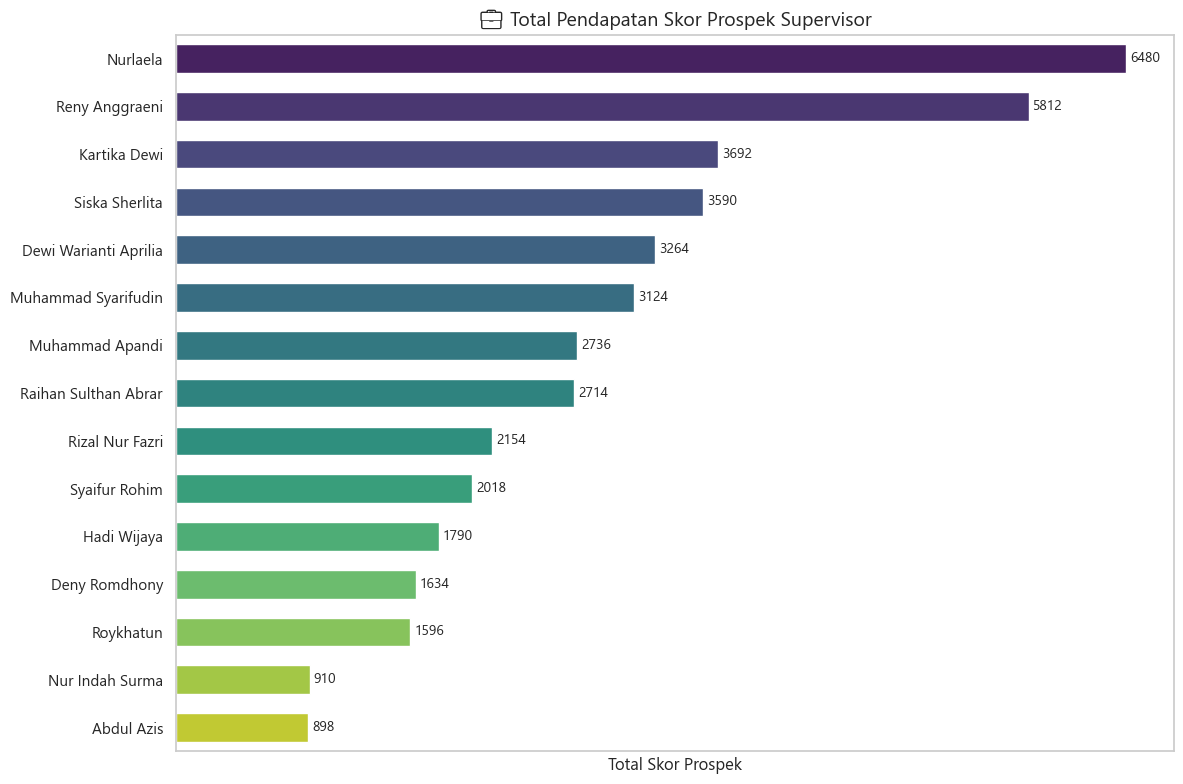

In [86]:
# Hitung total skor prospek per supervisor
merged = aktivitas.merge(supervisor, on='supervisor_id', how='left')
supervisor_score = (
    merged.groupby("nama_supervisor")["skor_prospek_konsumen"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualisasi (horizontal bar chart)
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=supervisor_score,
    x="skor_prospek_konsumen",
    y="nama_supervisor",
    palette="viridis",
    width = 0.6
)

# Tambahkan label di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=10, weight="bold")

# Hapus grid
ax.grid(False)

# Hapus xticks (angka di sumbu X), tapi biarkan label X
ax.set_xticks([])

# Hapus label Y tapi biarkan yticks (nama supervisor)
ax.set_ylabel("")

# Tambahkan judul dan label sumbu X
plt.title("💼 Total Pendapatan Skor Prospek Supervisor", fontsize=14, weight="bold")
plt.xlabel("Total Skor Prospek")

plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Visualisasi menampilkan **diagram batang horizontal** yang menunjukkan total skor prospek konsumen berdasarkan masing-masing supervisor.  
Hasil ini dapat diinterpretasikan sebagai berikut:
- Supervisor dengan skor tertinggi mencerminkan **kemampuan dalam membimbing dan mengarahkan tim marketing** secara efektif.  
- Adanya **disparitas skor** antar supervisor dapat menunjukkan perbedaan strategi pengelolaan, pengalaman, atau efektivitas dalam menjalankan peran kepemimpinan.  
- Jika distribusi skor relatif merata, maka hal tersebut mengindikasikan **stabilitas dan konsistensi performa antar divisi supervisi**.

Analisis ini juga dapat digunakan untuk menilai **hubungan antara produktivitas tim marketing dan gaya manajerial supervisor** masing-masing.

### ✅ **Kesimpulan**
Hasil analisis menunjukkan bahwa **total skor prospek konsumen dapat dijadikan indikator performa kepemimpinan supervisor**.  
Supervisor dengan skor tinggi terbukti memiliki **dampak signifikan terhadap efektivitas tim dan hasil bisnis**.  
Temuan ini menjadi dasar untuk:
- Memberikan **penghargaan atau insentif berbasis kinerja**.  
- Mengidentifikasi **supervisor teladan** yang dapat menjadi role model.  
- Menyusun **strategi pengembangan kepemimpinan** yang lebih terarah dan berbasis data.

## 🧭 **Analisis 13 : Segmentasi Jenis Kelamin Staff Marketing**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengetahui **proporsi distribusi jenis kelamin** di antara seluruh staff marketing.  
Dengan memahami komposisi ini, perusahaan dapat:
- Mengevaluasi **keseimbangan gender** dalam tim marketing.  
- Menilai apakah terdapat **kesenjangan representasi** antar jenis kelamin.  
- Mengidentifikasi potensi kebutuhan kebijakan **diversitas dan inklusivitas** di lingkungan kerja.

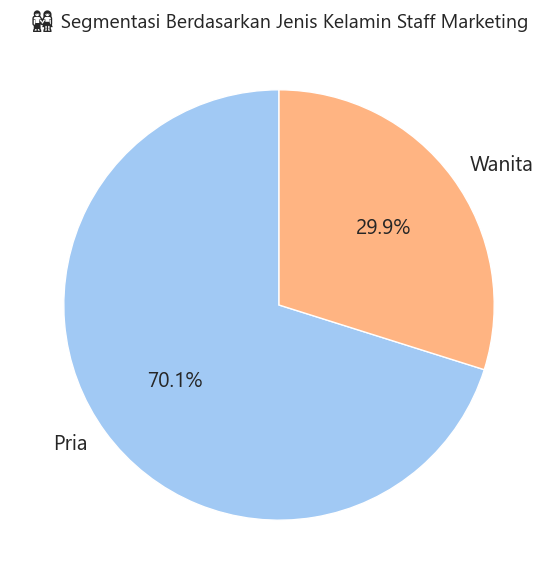

In [87]:
# Hitung distribusi gender
gender_staff = staff_marketing["jenis_kelamin"].value_counts().reset_index()
gender_staff.columns = ["Jenis Kelamin", "Jumlah"]

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_staff["Jumlah"],
    labels=gender_staff["Jenis Kelamin"],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel", len(gender_staff)),
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 15, "weight": "bold"}  # Persentase tebal
)
plt.title("👫 Segmentasi Berdasarkan Jenis Kelamin Staff Marketing", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Visualisasi berbentuk **diagram pie (lingkaran)** memperlihatkan pembagian persentase antara staff marketing laki-laki dan perempuan.  
Interpretasi dari hasil ini dapat mencakup:
- Jika salah satu jenis kelamin mendominasi, hal tersebut bisa mencerminkan **preferensi rekrutmen atau dinamika peran dalam tim pemasaran**.  
- Sebaliknya, distribusi yang seimbang menunjukkan bahwa perusahaan memiliki **proporsi gender yang adil dan representatif**.  
- Informasi ini juga bermanfaat untuk melihat apakah **komposisi gender berpengaruh terhadap performa atau strategi komunikasi tim marketing**.

### ✅ **Kesimpulan**
Analisis menunjukkan bahwa **komposisi gender dalam tim marketing** merupakan aspek penting dalam menciptakan dinamika kerja yang optimal.  
Keseimbangan gender tidak hanya mendukung **keragaman ide dan pendekatan pemasaran**, tetapi juga dapat meningkatkan **kinerja kolaboratif dan citra organisasi** sebagai tempat kerja yang inklusif.

## 🧭 **Analisis 14 : Distribusi Usia Staff Marketing**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memahami **sebaran usia staff marketing** dalam organisasi.  
Dengan melihat distribusi usia, perusahaan dapat:
- Mengetahui **proporsi generasi muda dan senior** di tim marketing.  
- Mengidentifikasi potensi **gap pengalaman dan adaptabilitas teknologi** antar kelompok usia.  
- Menyusun strategi **pengembangan SDM** yang sesuai dengan karakteristik demografis tenaga kerja.

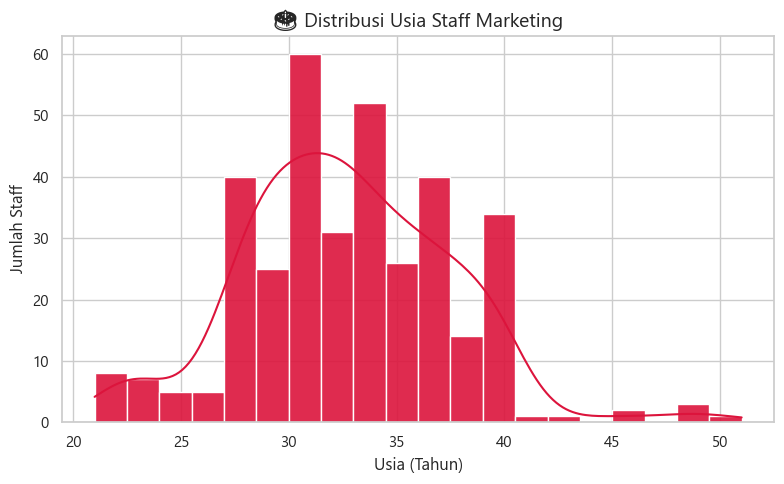

In [88]:
# Visualisasi distribusi usia staff marketing
plt.figure(figsize=(8,5))
sns.histplot(
    staff_marketing["usia"],
    bins=20,              # 🔹 Lebih banyak bin (detail lebih halus)
    kde=True,             # 🔹 Garis distribusi halus
    color="crimson",      # 🔹 Warna lebih kuat dari lightcoral
    alpha=0.9,            # 🔹 Warna lebih padat (kurang transparan)
    edgecolor="white",    # 🔹 Tambahkan batas putih biar kontras
    linewidth=1
)

# Judul dan label sumbu
plt.title("🎂 Distribusi Usia Staff Marketing", fontsize=14, weight="bold")
plt.xlabel("Usia (Tahun)")
plt.ylabel("Jumlah Staff")

plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Grafik histogram dengan garis *kde (kernel density)* menggambarkan pola distribusi usia staff marketing.  
Beberapa interpretasi umum dari hasil ini:
- Jika puncak distribusi berada di usia muda, tim marketing cenderung **enerjik, adaptif, dan cepat berinovasi**.  
- Jika terdapat sebaran luas atau dua puncak, menunjukkan adanya **kombinasi generasi muda dan senior** yang berpotensi memperkaya kolaborasi.  
- Distribusi yang terlalu condong ke satu sisi menandakan perlunya **penyeimbangan komposisi usia** agar dinamika tim lebih optimal.

### ✅ **Kesimpulan**
Analisis ini memberikan wawasan penting tentang **struktur usia dalam tim marketing**.  
Dengan pemahaman ini, perusahaan dapat merancang program yang lebih tepat sasaran seperti:
- **Pelatihan berbasis usia** untuk peningkatan kompetensi digital atau kepemimpinan.  
- **Strategi regenerasi tim** guna menjaga kesinambungan performa.  
- Meningkatkan sinergi antar generasi untuk mendukung **kinerja pemasaran jangka panjang**.

## 🧭 **Analisis 15 : Kategori Usia Staff Marketing per Jenis Kelamin**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengidentifikasi **komposisi usia staff marketing** berdasarkan **jenis kelamin**.  
Dengan membagi usia ke dalam beberapa kategori, perusahaan dapat:
- Mengetahui kelompok usia dominan dalam tim marketing.  
- Melihat apakah terdapat **perbedaan distribusi usia antar gender**.  
- Mengukur keseimbangan tenaga kerja dari aspek **usia dan pengalaman kerja**.

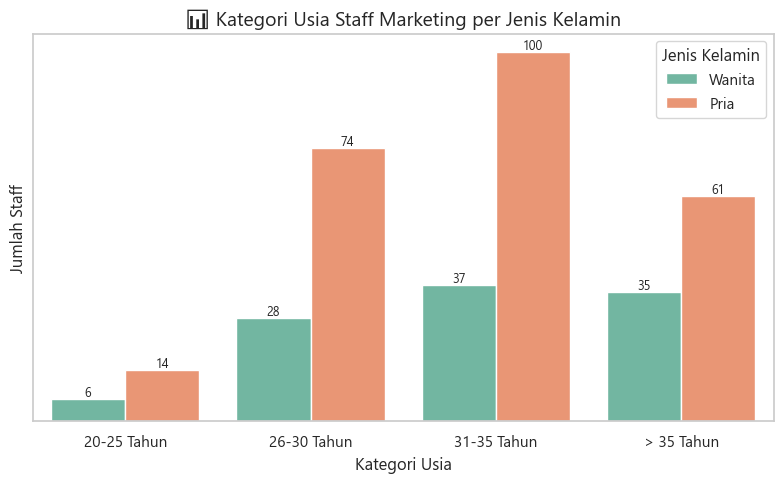

In [89]:
# Buat kategori usia 
bins = [0, 25, 30, 35, staff_marketing["usia"].max()] 
labels = ["20-25 Tahun", "26-30 Tahun", "31-35 Tahun", "> 35 Tahun"] 
staff_marketing["kategori_usia"] = pd.cut(staff_marketing["usia"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=staff_marketing,
    x="kategori_usia",
    hue="jenis_kelamin",
    palette="Set2"
)

# Hapus grid
ax.grid(False)

# Hapus y-ticks tapi biarkan label Y
ax.set_yticks([])

# Tambahkan label di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=9, weight="bold")

# Judul dan label sumbu
plt.title("📊 Kategori Usia Staff Marketing per Jenis Kelamin", fontsize=14, weight="bold")
plt.xlabel("Kategori Usia")
plt.ylabel("Jumlah Staff")

# Legend
plt.legend(title="Jenis Kelamin")

plt.tight_layout()
plt.show()



### 📊 **Interpretasi Hasil**
Grafik *countplot* menampilkan jumlah staff marketing dalam empat kategori usia — *20–25 tahun*, *26–30 tahun*, *31–35 tahun*, dan *>35 tahun* — dengan pembeda warna berdasarkan jenis kelamin.  
Dari hasil ini, dapat diinterpretasikan bahwa:
- Kelompok usia dengan jumlah terbesar menunjukkan **rentang usia produktif dominan** dalam tim.  
- Jika terdapat dominasi gender pada rentang usia tertentu, hal ini dapat mencerminkan **pola rekrutmen atau peran spesifik yang umum diisi oleh gender tersebut**.  
- Kategori usia yang lebih tinggi biasanya mencerminkan **tingkat pengalaman yang lebih matang**, sedangkan usia muda lebih adaptif terhadap strategi pemasaran modern.

### ✅ **Kesimpulan**
Distribusi usia per jenis kelamin membantu perusahaan memahami **struktur demografis tim marketing secara lebih detail**.  
Wawasan ini dapat dimanfaatkan untuk:
- Merancang **strategi pengembangan karier dan pelatihan lintas generasi**.  
- Menjaga keseimbangan antara **pengalaman dan inovasi** dalam tim.  
- Mendukung kebijakan rekrutmen yang lebih **inklusif dan berkelanjutan**.

---

## 🧭 **Analisis 16 : Total Skor Prospek per Nama Perumahan**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengevaluasi **kinerja prospek konsumen berdasarkan masing-masing proyek perumahan**.  
Dengan menghitung total skor prospek per proyek, perusahaan dapat:
- Mengidentifikasi proyek yang memiliki **daya tarik tertinggi** di mata konsumen.  
- Menilai **efektivitas strategi pemasaran** per proyek.  
- Menentukan prioritas pengembangan dan promosi untuk proyek yang paling potensial.

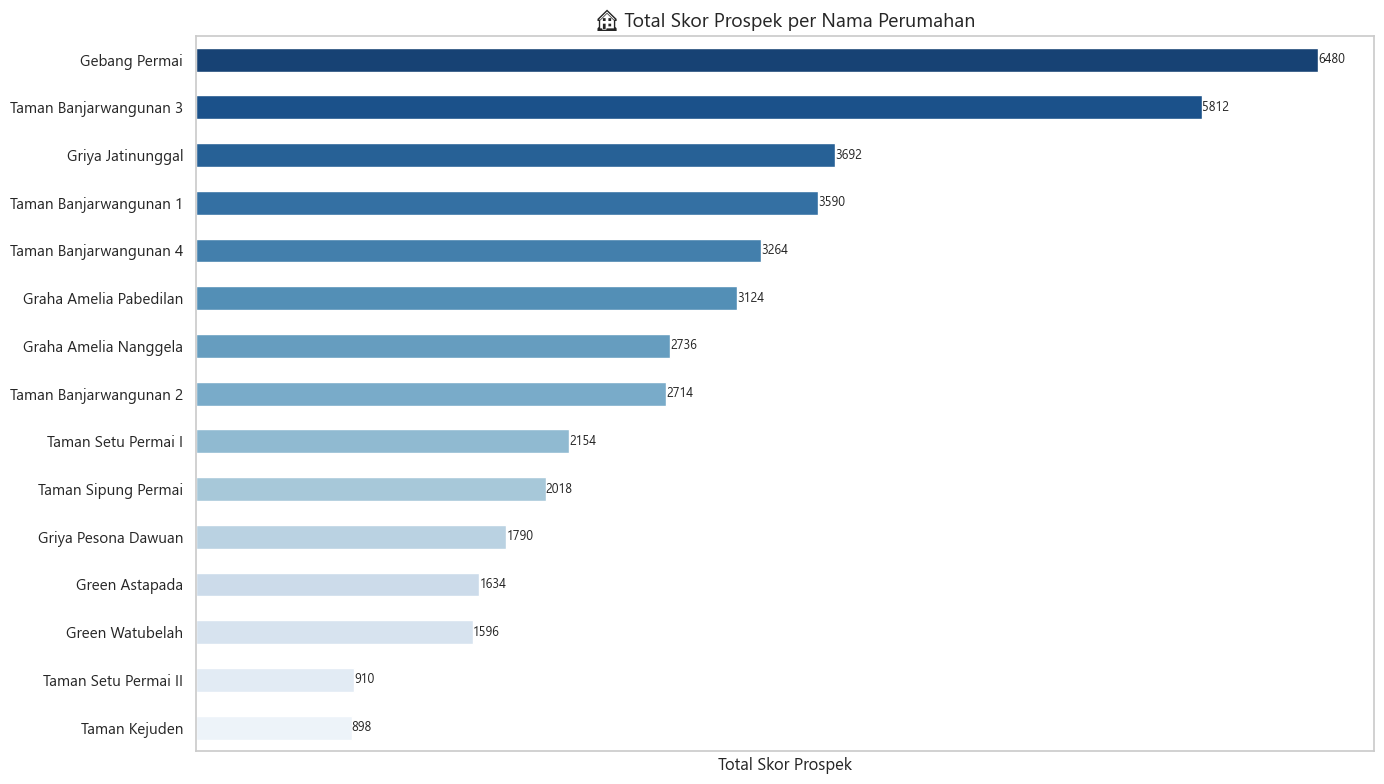

In [90]:
skor_proyek = aktivitas.groupby('minat_proyek')['skor_prospek_konsumen'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,8))
ax = sns.barplot(
    data=skor_proyek,
    x="skor_prospek_konsumen",
    y="minat_proyek",
    palette="Blues_r",
    width = 0.5
)

# Hapus grid
ax.grid(False)

# Hapus xticks tapi tetap tampilkan label X
ax.set_xticks([])

# Hapus ylabel tapi biarkan yticks
ax.set_ylabel("")

# Tambahkan label di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, weight="bold")

# Judul dan label sumbu
plt.title("🏠 Total Skor Prospek per Nama Perumahan", fontsize=14, weight="bold")
plt.xlabel("Total Skor Prospek")

plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Grafik *barplot horizontal* menunjukkan total skor prospek konsumen untuk setiap proyek perumahan.  
Interpretasi hasil meliputi:
- Proyek dengan skor prospek tertinggi menunjukkan **minat konsumen yang besar** serta potensi penjualan yang kuat.  
- Perbedaan signifikan antar proyek dapat mencerminkan **variasi lokasi, fasilitas, harga, atau strategi marketing**.  
- Proyek dengan skor rendah mungkin membutuhkan **intervensi promosi tambahan** atau **penyesuaian strategi komunikasi pasar**.

### ✅ **Kesimpulan**
Analisis ini memberikan gambaran menyeluruh mengenai **performansi prospek per proyek perumahan**.  
Dari hasilnya, perusahaan dapat:
- Menetapkan **prioritas investasi dan promosi** pada proyek dengan performa terbaik.  
- Mengevaluasi **strategi marketing yang paling efektif** untuk direplikasi di proyek lain.  
- Menggunakan hasil skor sebagai **indikator potensial penjualan** dalam perencanaan bisnis jangka menengah.

## 🧭 **Analisis 17 : Segmentasi Progress Pembangunan Perumahan**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk menggambarkan **tingkat kemajuan pembangunan proyek perumahan** secara keseluruhan.  
Dengan melihat distribusi progress pembangunan, perusahaan dapat:
- Memantau **proporsi proyek pada tiap tahap penyelesaian**.  
- Mengidentifikasi **proyek yang sudah mendekati selesai** maupun yang masih dalam tahap awal.  
- Menilai **efisiensi pelaksanaan proyek** serta mengantisipasi keterlambatan pembangunan.

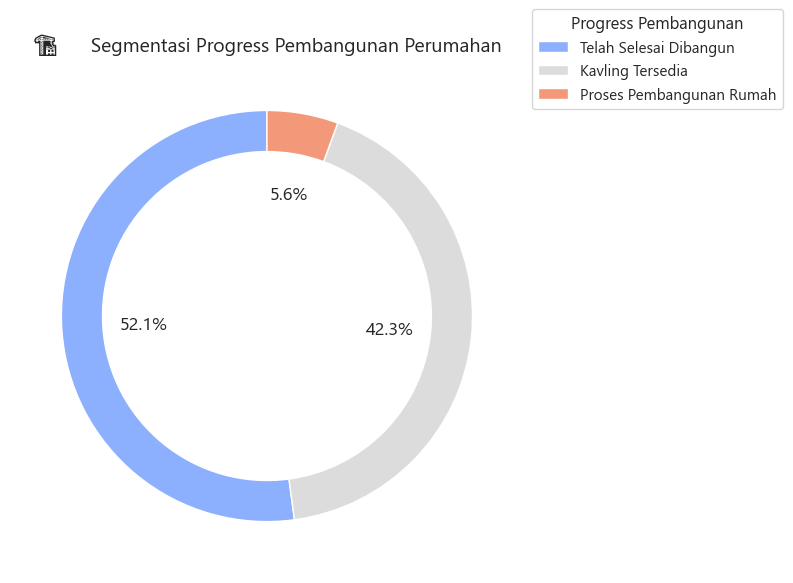

In [91]:
# Hitung distribusi progress pembangunan
progress_prop = proyek["progress_pembangunan"].value_counts().reset_index()
progress_prop.columns = ["Progress Pembangunan", "Jumlah"]

# Warna yang lebih menarik
colors = sns.color_palette("coolwarm", len(progress_prop))

# Visualisasi Donut Chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    progress_prop["Jumlah"],
    labels=None,  # 🔹 Hapus label dari pie
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.2, "edgecolor": "white"},  # 🔹 Lubang lebih kecil
    textprops={"fontsize": 13, "weight": "bold"}        # 🔹 Angka persentase besar & tebal
)

# Tambahkan legend sebagai pengganti label
plt.legend(
    wedges,
    progress_prop["Progress Pembangunan"],
    title="Progress Pembangunan",
    loc="center left",
    bbox_to_anchor=(1, 0.5, 0.5, 1)
)

# Judul
plt.title("🏗️ Segmentasi Progress Pembangunan Perumahan", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Visualisasi menggunakan **donut chart** menampilkan proporsi setiap kategori progress pembangunan dalam bentuk persentase.  
Interpretasi yang dapat diambil:
- Proporsi besar pada kategori tertentu (misalnya *Selesai* atau *90%*) menandakan **keberhasilan manajemen proyek dan kesiapan pemasaran unit**.  
- Sebaliknya, jika sebagian besar proyek masih di tahap awal (*<50%*), hal ini menunjukkan perlunya **percepatan konstruksi** agar target penjualan tidak terhambat.  
- Distribusi yang seimbang antar kategori menunjukkan **perencanaan bertahap yang terukur** dalam pipeline pembangunan.

### ✅ **Kesimpulan**
Analisis ini memberikan wawasan visual tentang **status progres fisik proyek perumahan**.  
Dari hasilnya, perusahaan dapat:
- Melakukan **pengendalian proyek yang lebih akurat** berdasarkan sebaran progress.  
- Menentukan **strategi promosi bertahap** sesuai dengan kesiapan unit.  
- Menggunakan data ini sebagai **dasar pelaporan ke manajemen dan calon investor** terkait tingkat kemajuan proyek secara keseluruhan.

## 🧭 **Analisis 18 : Total Progress Administrasi per Perumahan**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengevaluasi **tingkat kemajuan administratif proyek perumahan**.  
Proses administrasi merupakan aspek penting dalam pengelolaan proyek, mencakup perizinan, legalitas, dan dokumentasi internal.  
Dengan analisis ini, perusahaan dapat:
- Memantau **tahapan administrasi proyek yang telah diselesaikan**.  
- Mengidentifikasi **hambatan administratif** yang dapat memperlambat progres proyek.  
- Menentukan **prioritas tindak lanjut** pada proyek dengan tingkat penyelesaian administrasi rendah.

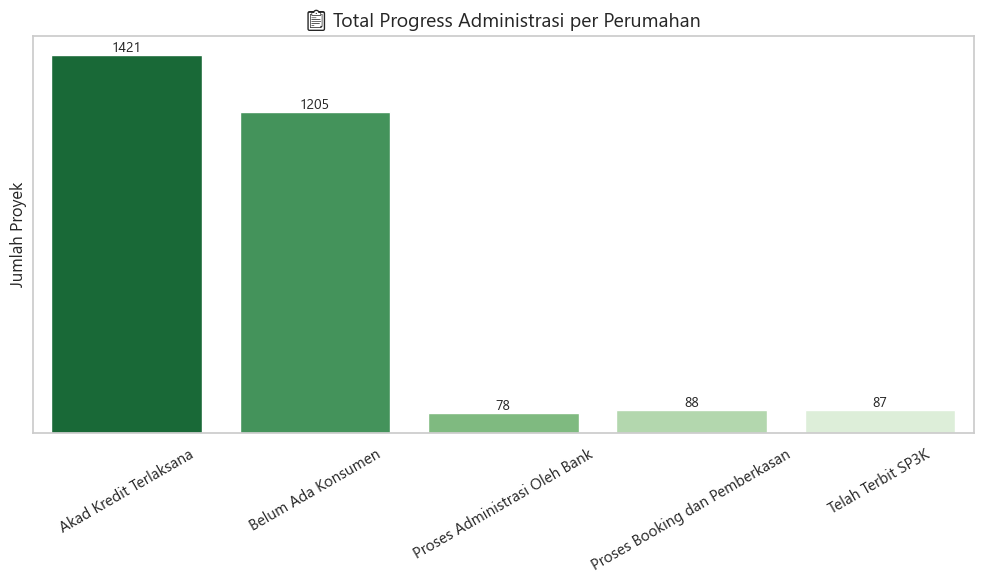

In [92]:
# Hitung jumlah data per kategori progress_administrasi
progress_admin = (
    proyek.groupby("progress_administrasi")
    .size()
    .reset_index(name="total_progress")
)

# Visualisasi
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=progress_admin,
    x="progress_administrasi",
    y="total_progress",
    palette="Greens_r"
)

# Hapus grid
ax.grid(False)

# Hapus label X, tapi biarkan ticks-nya tampil
ax.set_xlabel("")

# Hilangkan y-ticks (garis & angka) tapi biarkan label sumbu Y
ax.set_yticks([])

# Tambahkan label di atas tiap bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, weight="bold")

# Judul & label sumbu
plt.title("📋 Total Progress Administrasi per Perumahan", fontsize=14, weight="bold")
plt.ylabel("Jumlah Proyek")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Grafik *barplot vertikal* menampilkan jumlah proyek berdasarkan kategori *progress administrasi*.  
Interpretasi hasil mencakup:
- Kategori dengan jumlah proyek tertinggi menunjukkan **tahapan administratif yang paling sering dicapai**.  
- Jika terdapat ketimpangan besar antar kategori, hal ini bisa menandakan **perbedaan kesiapan dokumen atau kecepatan birokrasi antar proyek**.  
- Proyek dengan *progress administrasi* rendah perlu **pemantauan khusus** agar tidak menghambat fase pembangunan berikutnya.

### ✅ **Kesimpulan**
Analisis ini memberikan gambaran penting tentang **efektivitas proses administratif** dalam pengelolaan proyek perumahan.  
Hasilnya dapat digunakan untuk:
- **Menilai kinerja tim administrasi proyek.**  
- **Mengoptimalkan alur dokumentasi dan perizinan.**  
- Menjadi dasar dalam **penentuan jadwal realisasi proyek** dan pelaporan kemajuan ke pihak manajemen maupun regulator.

## 🧭 **Analisis 19 : Tren Skor Prospek Perumahan Gebang Permai**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk memantau **perkembangan skor prospek konsumen pada proyek perumahan Gebang Permai dari waktu ke waktu**.  
Dengan menelusuri tren bulanan, perusahaan dapat:
- Menilai **efektivitas kegiatan marketing** terhadap peningkatan minat konsumen.  
- Mengidentifikasi **pola musiman** atau periode tertentu dengan performa prospek tinggi.  
- Mengambil keputusan strategis terkait **alokasi sumber daya pemasaran dan promosi** untuk proyek tersebut.

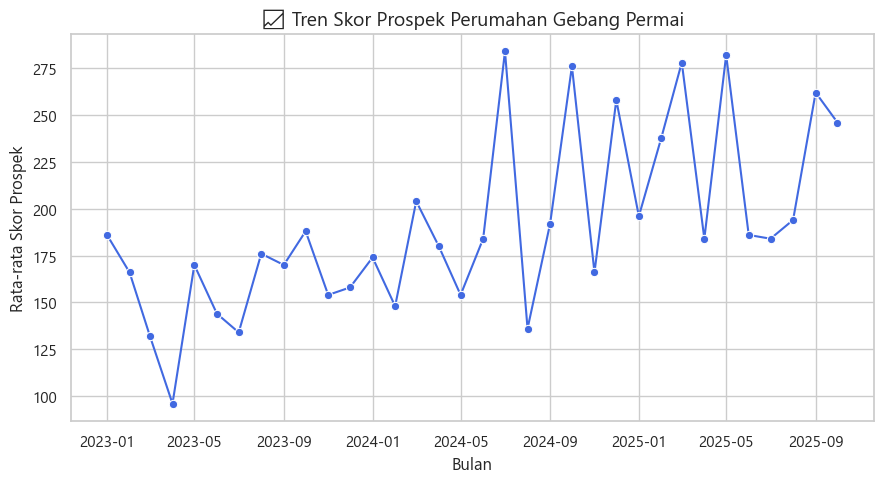

In [93]:
# Filter data hanya untuk perumahan Gebang Permai
gebang_tren = aktivitas[aktivitas["minat_proyek"] == "Gebang Permai"].copy()
gebang_tren["bulan"] = pd.to_datetime(gebang_tren["tanggal"]).dt.to_period("M").dt.to_timestamp()
tren_gebang = gebang_tren.groupby("bulan")["skor_prospek_konsumen"].sum().reset_index()

plt.figure(figsize=(9,5))
sns.lineplot(data=tren_gebang, x="bulan", y="skor_prospek_konsumen", marker="o", color="royalblue")
plt.title("📈 Tren Skor Prospek Perumahan Gebang Permai", fontsize=14, weight="bold")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Skor Prospek")
plt.tight_layout()
plt.show()


### 📊 **Interpretasi Hasil**
Grafik *line chart* menunjukkan perubahan total skor prospek per bulan untuk proyek Gebang Permai.  
Interpretasi hasil meliputi:
- **Kenaikan tren** mengindikasikan peningkatan ketertarikan konsumen serta efektivitas strategi pemasaran.  
- **Penurunan tren** dapat menandakan penurunan daya tarik pasar, faktor eksternal (seperti ekonomi atau kompetisi), atau kurang optimalnya aktivitas marketing.  
- Fluktuasi tren menunjukkan adanya **pergeseran dinamika pasar**, yang bisa menjadi sinyal untuk penyesuaian strategi promosi.

### ✅ **Kesimpulan**
Analisis tren ini membantu perusahaan memahami **arah perkembangan prospek konsumen untuk proyek Gebang Permai**.  
Hasilnya dapat dimanfaatkan untuk:
- Mengevaluasi **kinerja tim marketing dan supervisor** yang bertanggung jawab pada proyek tersebut.  
- Mengidentifikasi **periode terbaik untuk promosi atau kampanye digital.**  
- Menyusun **strategi penjualan adaptif** guna mempertahankan atau meningkatkan performa prospek di bulan-bulan berikutnya.

## 🧭 **Analisis 20 : Proporsi Referensi Informasi – Perumahan Gebang Permai**

### 🎯 **Tujuan**
Analisis ini bertujuan untuk mengetahui **sumber referensi utama calon konsumen** yang tertarik pada proyek perumahan **Gebang Permai**.  
Dengan memahami distribusi sumber informasi, perusahaan dapat:
- Mengidentifikasi **kanal pemasaran paling efektif** dalam menarik minat.  
- Menentukan **alokasi anggaran promosi** yang lebih optimal berdasarkan performa masing-masing kanal.  
- Mengevaluasi **strategi komunikasi dan branding** proyek perumahan tersebut.

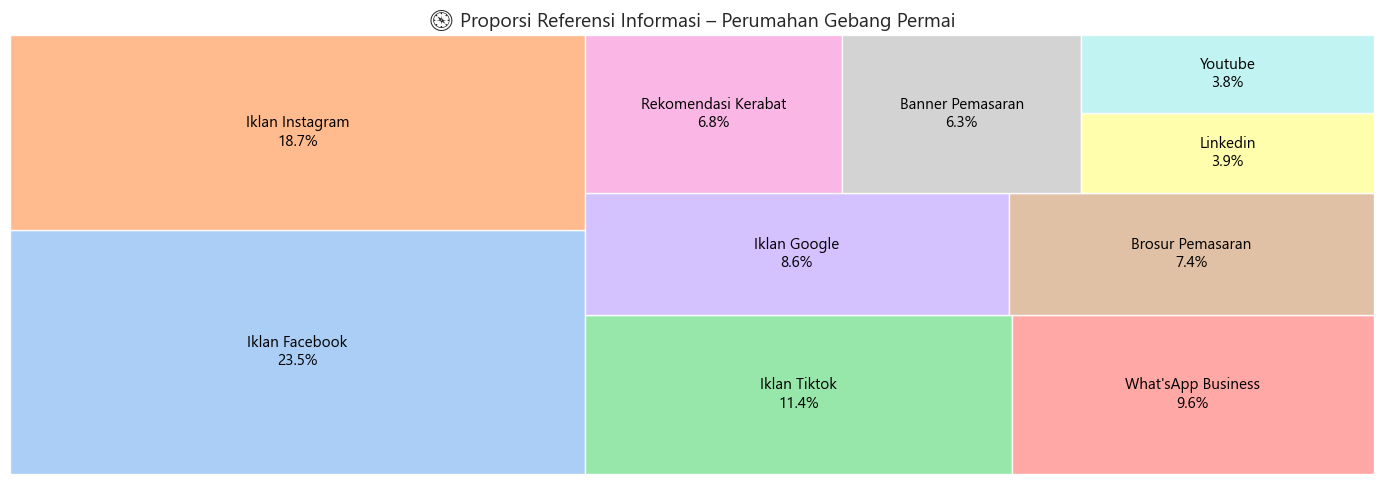

In [94]:
# Filter data hanya untuk perumahan Gebang Permai
gebang_ref = aktivitas[aktivitas["minat_proyek"] == "Gebang Permai"]
ref_prop = gebang_ref["referensi_informasi"].value_counts(normalize=True).reset_index()
ref_prop.columns = ["Referensi Informasi", "Proporsi"]

# Ubah ke persen agar lebih mudah dibaca di label
ref_prop["Proporsi (%)"] = ref_prop["Proporsi"] * 100

# Warna lembut (pastel) agar tetap sesuai tema
colors = sns.color_palette("pastel", len(ref_prop))

# Visualisasi Treemap
plt.figure(figsize=(14,5))
squarify.plot(
    sizes=ref_prop["Proporsi"],
    label=[
        f"{ref}\n{prop:.1f}%"
        for ref, prop in zip(ref_prop["Referensi Informasi"], ref_prop["Proporsi (%)"])
    ],
    color=colors,
    alpha=0.9,
    text_kwargs={"fontsize": 11, "weight": "bold", "color": "black"}
)

# Judul
plt.title("🧭 Proporsi Referensi Informasi – Perumahan Gebang Permai", fontsize=14, weight="bold")

# Hilangkan sumbu untuk tampilan bersih
plt.axis("off")
plt.tight_layout()
plt.show()

### 📊 **Interpretasi Hasil**
Treemap menampilkan proporsi sumber referensi informasi berdasarkan **persentase kontribusi terhadap total prospek**.  
Beberapa poin penting yang dapat diperhatikan:
- **Ukuran kotak** mewakili besar proporsi — semakin besar kotak, semakin dominan kanal tersebut.  
- **Label persentase** membantu mengidentifikasi kanal utama (misalnya media sosial, rekomendasi teman, atau pameran properti).  
- Kanal dengan proporsi kecil mungkin memerlukan **evaluasi efektivitas atau strategi peningkatan jangkauan**.  

Jika, misalnya, media sosial menunjukkan porsi terbesar, berarti strategi digital marketing berjalan efektif.  
Sebaliknya, jika banyak konsumen berasal dari referensi langsung, hal ini menandakan **kekuatan word-of-mouth** atau kepuasan pelanggan yang tinggi.

### ✅ **Kesimpulan**
Analisis ini memberikan gambaran strategis mengenai **asal-usul informasi yang memengaruhi keputusan calon pembeli di Gebang Permai**.  
Hasilnya dapat digunakan untuk:
- Menguatkan kanal dominan dengan **konten yang lebih terarah dan konsisten**.  
- Mengoptimalkan kanal dengan proporsi rendah agar **lebih berkontribusi terhadap lead generation**.  
- Menyusun strategi pemasaran berbasis data guna meningkatkan **efisiensi dan efektivitas promosi proyek properti**.

## ⭐ **Analisis 21 : Rata-Rata Pencapaian Skor Tiap Aspek – Perumahan Gebang Permai**

### 🎯 **Tujuan**
Analisis ini dilakukan untuk mengevaluasi **tingkat pencapaian kualitas proyek Gebang Permai** berdasarkan empat aspek utama penilaian, yaitu:
1. **Kualitas bangunan**  
2. **Fasilitas bangunan**  
3. **Kualitas infrastruktur**  
4. **Akses lokasi**

Tujuannya adalah untuk mengidentifikasi **aspek-aspek yang paling unggul maupun yang perlu ditingkatkan** dalam persepsi konsumen, sehingga dapat digunakan sebagai dasar perbaikan strategi pembangunan dan pemasaran.

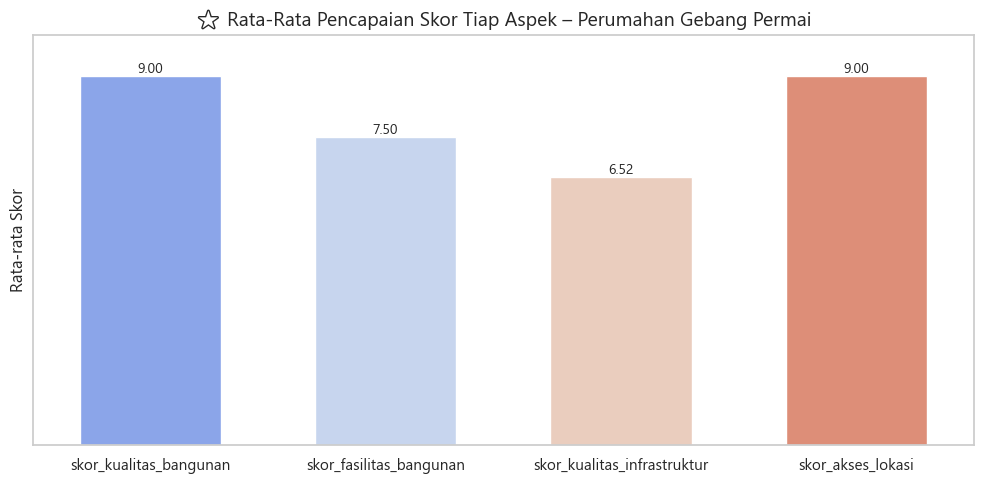

In [95]:
# Filter hanya data untuk proyek Gebang Permai
gebang_data = aktivitas[aktivitas["minat_proyek"] == "Gebang Permai"]

# Hitung rata-rata pencapaian skor untuk proyek Gebang Permai
rata_skor_gebang = gebang_data[[
    "skor_kualitas_bangunan",
    "skor_fasilitas_bangunan",
    "skor_kualitas_infrastruktur",
    "skor_akses_lokasi"
]].mean().reset_index()

rata_skor_gebang.columns = ["Aspek", "Rata-rata Skor"]

# Visualisasi
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=rata_skor_gebang,
    x="Aspek",
    y="Rata-rata Skor",
    palette="coolwarm",
    width = 0.6
)

# Hapus grid
ax.grid(False)

# Hapus xlabel tapi biarkan ticks-nya tampil
ax.set_xlabel("")

# Hapus y-ticks tapi biarkan label sumbu Y
ax.set_yticks([])

# Tambahkan label di atas tiap bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",
        label_type="edge",
        fontsize=10,
        weight="bold"
    )

# Judul & label sumbu
plt.title("⭐ Rata-Rata Pencapaian Skor Tiap Aspek – Perumahan Gebang Permai", fontsize=14, weight="bold")
plt.ylabel("Rata-rata Skor")
plt.ylim(0, 10)

plt.tight_layout()
plt.show()


### 📊 **Interpretasi Hasil**
Visualisasi batang menampilkan **rata-rata skor (0–10)** untuk tiap aspek.  
Beberapa poin interpretatif:
- **Aspek dengan skor tertinggi** menunjukkan kekuatan utama proyek Gebang Permai — misalnya, kualitas bangunan yang baik menandakan kepuasan konsumen terhadap mutu konstruksi.  
- **Aspek dengan skor menengah hingga rendah** menggambarkan area yang masih perlu diperhatikan, seperti infrastruktur atau fasilitas umum yang mungkin belum optimal.  
- Pola perbandingan antar-aspek memberikan gambaran tentang **keseimbangan kualitas proyek secara keseluruhan**.

Jika, misalnya, skor “akses lokasi” lebih tinggi dibandingkan aspek lainnya, berarti **faktor lokasi menjadi nilai jual utama**, sedangkan aspek “fasilitas bangunan” dengan skor lebih rendah bisa menjadi fokus pengembangan berikutnya.

### ✅ **Kesimpulan**
Berdasarkan hasil analisis, proyek Gebang Permai memiliki performa bervariasi pada tiap aspek kualitas.  
Temuan ini memberikan arah strategis untuk:
- **Mempertahankan aspek dengan skor tinggi** sebagai keunggulan kompetitif proyek.  
- **Meningkatkan aspek dengan skor lebih rendah** melalui peningkatan kualitas fasilitas dan infrastruktur.  
- Membangun citra proyek yang lebih **konsisten dan unggul di seluruh aspek penilaian konsumen**.

---

# 🧾 **Penutup**

## 🎯 **Ringkasan Akhir**
Seluruh analisis Python yang telah dilakukan memberikan **gambaran menyeluruh mengenai karakteristik staf marketing, performa proyek perumahan, serta perilaku prospek konsumen**.  
Beberapa poin utama yang dapat disimpulkan dari keseluruhan visualisasi adalah sebagai berikut:

1. **Profil dan Komposisi Staf Marketing**  
   - Distribusi jenis kelamin, usia, dan kategori usia memberikan pemahaman tentang **struktur demografis tim marketing**.  
   - Hasil ini berguna untuk perencanaan pelatihan, strategi rekrutmen, dan pembagian wilayah kerja yang lebih efektif.

2. **Kinerja Supervisor dan Skor Prospek**  
   - Analisis skor prospek per supervisor dan proyek menunjukkan **variasi signifikan dalam pencapaian tim**.  
   - Data ini dapat digunakan untuk **evaluasi performa, pemberian insentif, serta penguatan strategi supervisi lapangan.**

3. **Kualitas Proyek dan Kepuasan Prospek**  
   - Visualisasi rata-rata skor tiap aspek (kualitas bangunan, fasilitas, infrastruktur, dan akses lokasi) menggambarkan **kekuatan dan kelemahan proyek tertentu**, seperti Gebang Permai.  
   - Hasil ini dapat menjadi **bahan evaluasi peningkatan mutu proyek** agar lebih sesuai dengan preferensi konsumen.

4. **Analisis Perilaku dan Sumber Informasi Konsumen**  
   - Proporsi referensi informasi dan tren prospek bulanan menunjukkan pola **ketertarikan dan efektivitas kanal promosi**.  
   - Informasi ini penting untuk **menentukan channel pemasaran yang paling produktif dan efisien.**

---

## 🧠 **Insight Strategis**
Analisis ini membuka arah pengembangan strategis dalam pengelolaan proyek dan pemasaran, antara lain:

- 📈 **Optimalisasi Kinerja Tim Marketing:**  
  Gunakan hasil agregasi skor untuk menyusun sistem **monitoring performa berbasis data real-time**.

- 🏘️ **Perencanaan Pengembangan Proyek:**  
  Hasil rata-rata skor kualitas tiap aspek dapat dijadikan **dasar prioritas perbaikan fisik dan fasilitas proyek**.

- 💬 **Strategi Promosi yang Tepat Sasaran:**  
  Distribusi sumber referensi informasi menunjukkan **saluran paling efektif dalam menjangkau konsumen potensial.**

---

## 🛠️ **Rekomendasi Pengembangan**
1. Tambahkan **analisis tren waktu** (bulanan atau kuartalan) untuk memantau perubahan minat dan aktivitas prospek.  
2. Integrasikan data dengan **platform Business Intelligence (seperti Power BI atau Streamlit)** untuk pemantauan visual yang dinamis.  
3. Lakukan **segmentasi wilayah dan profil prospek** guna mengidentifikasi area potensial penjualan tertinggi.  
4. Kembangkan **model prediktif sederhana (machine learning)** untuk memperkirakan peluang keberhasilan prospek di masa depan.

---

## ✍️ **Penutup Akhir**
Rangkaian analisis Python ini bukan sekadar visualisasi data, tetapi merupakan **landasan pengambilan keputusan strategis berbasis data (data-driven decision making)**.  
Melalui pendekatan ini, perusahaan dapat:
- Meningkatkan efektivitas tim marketing,  
- Mengoptimalkan kualitas dan daya saing proyek, serta  
- Meningkatkan kepuasan dan loyalitas konsumen secara berkelanjutan.

---

📅 **Tanggal Analisis:** 30 Oktober 2025  
👤 **Disusun oleh:** Feby Renaldi  
🏢 **Posisi:** Data Analyst PT Karya Berkah Gemilang

---

> *"Visualisasi data bukan hanya untuk dilihat, tetapi untuk dipahami dan dijadikan dasar tindakan."*  
> — **Laporan Analisis Python Aktivitas Marketing & Kualitas Proyek Perumahan**

---